## odds

실패확률 대비 성공확률을 이야기한다.  
성공확률이 실패 확률에 비해 얼마나 더 큰가이다. 즉 odds가 클수록 성공확률이 크다는 것.  
<img src="https://drive.google.com/uc?export=download&id=1vCUk0Ft59E2chJ-J81IGQIDF0FAGr_XG">

특정 이벤트가 일어날 확률이 60%라고 할 때, odds = 0.6 / 0.4 = 1.5 이다.  
x가 0.5일 때, y값이 1인데, 이를 기준으로 봤을 때 그래프가 대칭적인 형태가 아니다.

## Logit
odds 함수에 밑이 e인 자연로그를 적용한 것이 바로 logit이다.  
<img src="https://drive.google.com/uc?export=download&id=1kISGH60lXayFVjLE3UfqhXsaw9yf0ik5">
x가 0.5일 때 y값이 0이되며, 그래프가 좌우 대칭인 모습을 보여준다.  
참고로 odds 함수값의 범위는 [0, ∞), logit은 함수값의 범위가 (-∞, ∞)이다.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use("seaborn")

prob_np = np.linspace(0.01, 0.99, 100)
prob_tf = tf.linspace(0.01, 0.99, 100)

print(prob_np)
print(prob_tf)

[0.01       0.01989899 0.02979798 0.03969697 0.04959596 0.05949495
 0.06939394 0.07929293 0.08919192 0.09909091 0.1089899  0.11888889
 0.12878788 0.13868687 0.14858586 0.15848485 0.16838384 0.17828283
 0.18818182 0.19808081 0.2079798  0.21787879 0.22777778 0.23767677
 0.24757576 0.25747475 0.26737374 0.27727273 0.28717172 0.29707071
 0.3069697  0.31686869 0.32676768 0.33666667 0.34656566 0.35646465
 0.36636364 0.37626263 0.38616162 0.39606061 0.4059596  0.41585859
 0.42575758 0.43565657 0.44555556 0.45545455 0.46535354 0.47525253
 0.48515152 0.49505051 0.50494949 0.51484848 0.52474747 0.53464646
 0.54454545 0.55444444 0.56434343 0.57424242 0.58414141 0.5940404
 0.60393939 0.61383838 0.62373737 0.63363636 0.64353535 0.65343434
 0.66333333 0.67323232 0.68313131 0.6930303  0.70292929 0.71282828
 0.72272727 0.73262626 0.74252525 0.75242424 0.76232323 0.77222222
 0.78212121 0.7920202  0.80191919 0.81181818 0.82171717 0.83161616
 0.84151515 0.85141414 0.86131313 0.87121212 0.88111111 0.89101

In [4]:
odds_np = prob_np / (1 - prob_np)
odds_tf = prob_tf / (1 - prob_tf)

logit_np = np.log(odds_np)
logit_tf = tf.math.log(odds_tf)

Text(0.5, 0, 'Probability')

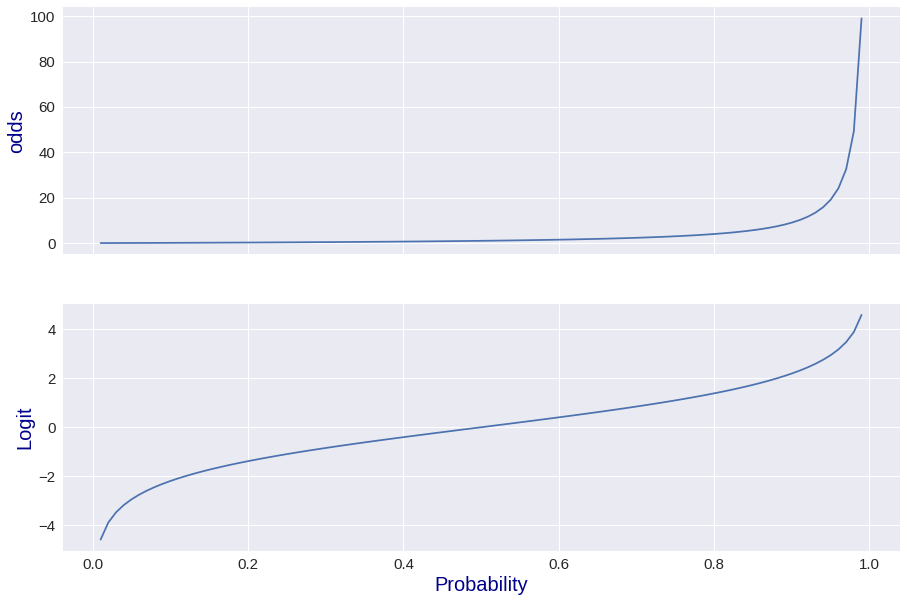

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

axes[0].plot(prob_np, odds_np)
axes[1].plot(prob_np, logit_np)

xticks = np.arange(0, 1.1, 0.2)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel("odds", fontsize=20, color="darkblue")
axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel("Logit", fontsize=20, color="darkblue")
axes[1].set_xlabel("Probability", fontsize=20, color="darkblue")

Text(0.5, 0, 'Probability')

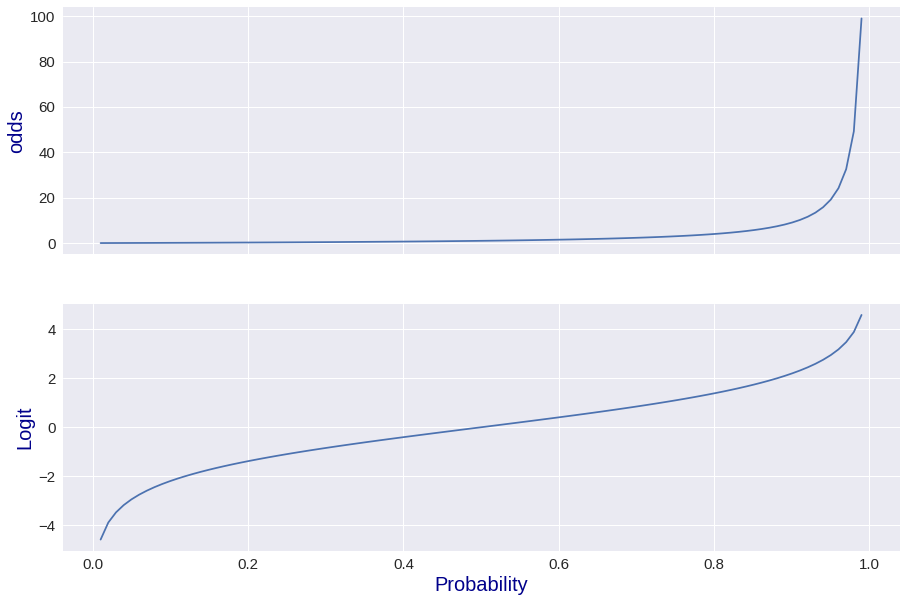

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

axes[0].plot(prob_np, odds_tf.numpy())
axes[1].plot(prob_np, logit_tf.numpy())

xticks = np.arange(0, 1.1, 0.2)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel("odds", fontsize=20, color="darkblue")
axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel("Logit", fontsize=20, color="darkblue")
axes[1].set_xlabel("Probability", fontsize=20, color="darkblue")

## Sigmoid

<img src="https://drive.google.com/uc?export=download&id=1z4DekNoW_ty2W80MIrkmrsoEAcDV_094">

output layer(마지막 layer)에 activation function을 sigmoid함수로 설정하게 되면, 1개의 logit 값을 받고 그에 대한 1개의 probability를 반환하는 Binary classification을 수행할 수 있게 된다.
즉, 입력된 사진이 고양이인지 고양이가 아닌지 분류할 수 있다.(cat or not cat). 

logit 함수 식의 양변에 exponential을 취하여 식을 정리하면
<img src="https://drive.google.com/uc?export=download&id=1vWTV7kBn-PbToUZQktvu7Lne7L_eHxHf">

sigmoid 함수가 나오는 것을 알 수 있다. 실제로 Logit과 sigmoid는 역함수관계(y=x 대칭)이다.

이제부터 Affine Transformation을 통해 얻은 값 Z를 Logit 함수의 출력값으로 취급할 것인데, 결국 logit 함수의 출력값을 sigmoid(Activation function) 함수의 입력으로 사용해 확률(Probability)의 형태로 변환하는 기능을 한다.

<img src="https://drive.google.com/uc?export=download&id=1i1q1ksiwlPpunlAMvNmrscIu2NUTmyrq">


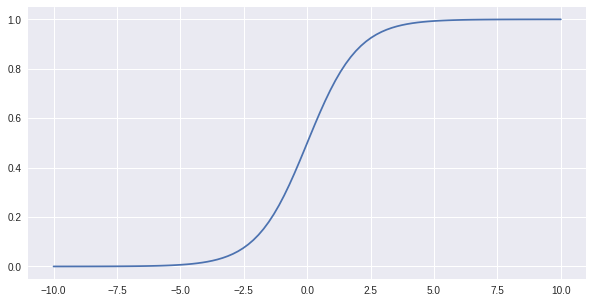

In [15]:
X = tf.linspace(-10, 10, 100)
sigmoid = tf.keras.layers.Activation("sigmoid")(X)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X.numpy(), sigmoid.numpy())

## Domain이 (음의 무한대 ~ 무한대) 값. 0일 때 함수값이 0.5(성공확률 0.5, 실패확률 0.5)
## 함수값은 0 ~ 1 사이 값으로 반환. logit ---> probability.

(100, 1)


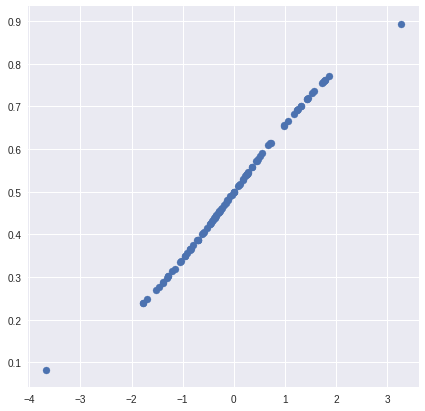

In [19]:
## Logistic Regression - Single Variate
## Logistic Regression은 Affine Transform에 sigmoid를 적용한 결과.
X = tf.random.normal(shape=(100, 1))
dense = tf.keras.layers.Dense(units=1, activation="sigmoid")
Y = dense(X)
print(Y.shape)

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X.numpy().flatten(), Y.numpy().flatten())

In [22]:
## Logistic Regression - Multi Variate
X = tf.random.normal(shape=(100, 5))
dense = tf.keras.layers.Dense(units=1, activation="sigmoid")
Y = dense(X)
print(Y.shape) ## Binary 0 or 1

print(Y.numpy()[:5])

(100, 1)
[[0.5562339 ]
 [0.48648694]
 [0.15509382]
 [0.27134973]
 [0.8005891 ]]


In [ ]:
## Binary Classifier with Dense Layers

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=10, activation="relu"))
model.add(tf.keras.layers.Dense(units=5, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) ## Binary classifier

## Softmax
<img src="https://drive.google.com/uc?export=download&id=1zLjDO-MjmbK74_I-zWXRScTr-I0MYecr">

softmax함수는 Logit vector를 입력 받아서, 분류하고자 하는 클래스의 수 K개에 대한 Probability vector로 변환해준다. 그리고 그 확률들의 총합은 1이다.  

<img src="https://drive.google.com/uc?export=download&id=11-c1XGGcunjid7hyI1VwuvWWl_cKkaQ4">

k개의 클래스에 대한 분류를 할 수 있는 Multi class Classification을 수행할 수 있다.  
마지막 layer의 형태가 분류하려는 클래스 1 × K 라면, softmax 함수를 거쳤을 때도 shape은 1 × K가 되어 총 합이 1이되고, 각각의 클래스에 대한 확률을 담고있는 벡터가 된다.


softmax로 두 개의 클래스에 대한 분류를 한다고 하면, 결국 sigmoid와 동일하다.  
<img src="https://drive.google.com/uc?export=download&id=1LdjOv8XIlu8-GTL_n-yySF3B-rPNEBhH">

마지막 layer에 sigmoid를 설정하면, 입력 데이터의 class=1일 확률을 구할 수 있으니,  
class=0일 확률은 1 - (class=1 probability)가 된다.  

softmax로 설정하면, class=0일 확률, class=1일 확률을 각각 얻게 된다. 

In [29]:
## Softmax
logit = tf.random.uniform(shape=(1, 5), minval=-10, maxval=10)
softmax_value = tf.keras.layers.Activation("softmax")(logit)
softmax_sum = tf.reduce_sum(softmax_value, axis=1)

print(f"Logits :\n {logit} \n")
print(f"Probabilities :\n {softmax_value} \n")
print(f"Sum of softmax values :\n {softmax_sum}")

Logits : [[ 0.42586136 -6.4135194  -7.4464583   4.0895443  -7.3447633 ]]
Probabilities : [[2.49958709e-02 2.67647483e-05 9.52715072e-06 9.74957228e-01
  1.05470035e-05]]
Sum of softmax values : [0.99999994]


In [30]:
## Softmax
logit = tf.random.uniform(shape=(10, 5), minval=-10, maxval=10)
softmax_value = tf.keras.layers.Activation("softmax")(logit)
softmax_sum = tf.reduce_sum(softmax_value, axis=1)

print(f"Logits :\n {logit} \n")
print(f"Probabilities :\n {softmax_value} \n")
print(f"Sum of softmax values :\n {softmax_sum}")

Logits :
 [[ 4.217865  -6.7216873 -1.2057133 -9.477162  -7.30278  ]
 [-2.9113555  9.68803    9.321209  -3.1202292  4.077652 ]
 [-5.316241  -6.3970137 -9.668813   2.7997475 -4.312346 ]
 [-3.6243606 -5.6554246  7.5743313 -4.851434   1.3362217]
 [ 3.6157417 -5.6562448 -1.698575  -9.048708   9.431522 ]
 [-3.689456  -7.821152  -7.392957  -9.394264  -5.03433  ]
 [ 4.297426   2.9754143  1.2623711  5.647604  -5.93971  ]
 [ 1.9561005 -8.684144   5.875454   8.1665535  7.11693  ]
 [ 7.2522316 -1.559186   2.2819214  5.150814  -4.9582124]
 [ 1.3823204 -4.5689487  7.307417   6.067009  -1.9387865]] 

Probabilities :
 [[9.95579541e-01 1.76639878e-05 4.39183367e-03 1.12305543e-06
  9.87923613e-06]
 [1.98873454e-06 5.89414358e-01 4.08424914e-01 1.61385344e-06
  2.15707091e-03]
 [2.98361061e-04 1.01243764e-04 3.84099712e-06 9.98782396e-01
  8.14194093e-04]
 [1.36651252e-05 1.79280937e-06 9.98030663e-01 4.00592035e-06
  1.94969785e-03]
 [2.97125336e-03 2.79362013e-07 1.46204675e-05 9.39375155e-09
  9.9701

In [31]:
## Softmax in Dense Layers
logit = tf.random.uniform(shape=(8, 5), minval=-10, maxval=10)
dense = tf.keras.layers.Dense(units=8, activation="softmax")
Y = dense(logit)
print(tf.reduce_sum(Y, axis=1))

tf.Tensor(
[1.0000001  1.0000001  0.99999994 1.         1.0000001  1.
 1.0000001  1.0000001 ], shape=(8,), dtype=float32)


In [38]:
## Multiclass classifiers

class TestModel(tf.keras.models.Model):
    def __init__(self):
        super(TestModel, self).__init__()

        self.dense1 = tf.keras.layers.Dense(units=8, activation="relu")
        self.dense2 = tf.keras.layers.Dense(units=5, activation="relu")
        self.dense3 = tf.keras.layers.Dense(units=3, activation="softmax") ## 3 classes

    def call(self, x):
        print(f"X : {x.shape} \n {x.numpy()} \n")

        x = self.dense1(x)
        print(f"A1 : {x.shape} \n {x.numpy()} \n")

        x = self.dense2(x)
        print(f"A2 : {x.shape} \n {x.numpy()} \n")

        x = self.dense3(x)
        print(f"Y : {x.shape} \n {x.numpy()} \n")
        print(f"Sum of Y : {x.shape} \n {tf.reduce_sum(x, axis=1)}")

model = TestModel()
X = tf.random.uniform(shape=(8, 5), minval=-10, maxval=10)
Y = model(X)


X : (8, 5) 
 [[-9.5178175  -3.018415    0.4302044  -4.3166256  -6.375599  ]
 [-3.457234    5.0118065  -0.38795662  1.7969818  -1.7846203 ]
 [-7.224369   -8.193345    5.4092293   8.432085    3.150463  ]
 [ 2.1578808  -3.3694386   9.349363   -2.4771523  -1.7388487 ]
 [ 5.3845005  -8.526645    7.2815895   0.60335636  5.063074  ]
 [-2.8392053  -4.008646    8.250717   -9.769003    7.3419876 ]
 [ 5.465172    2.9943733   6.1772995  -5.2199507  -8.844829  ]
 [-7.0589542  -9.556298   -6.325772    1.710372    2.8240013 ]] 

A1 : (8, 8) 
 [[ 0.          8.315532    0.          0.          0.84297836  0.
   3.2220254   0.        ]
 [ 0.          5.6262107   0.          0.          0.          0.
   5.2767534   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.2348928   0.        ]
 [ 0.          0.          0.          0.          5.6899786   8.861443
   0.          4.3055453 ]
 [ 0.          0.          2.687568    0.46755692  4.2685843   7.7865424
   0.          